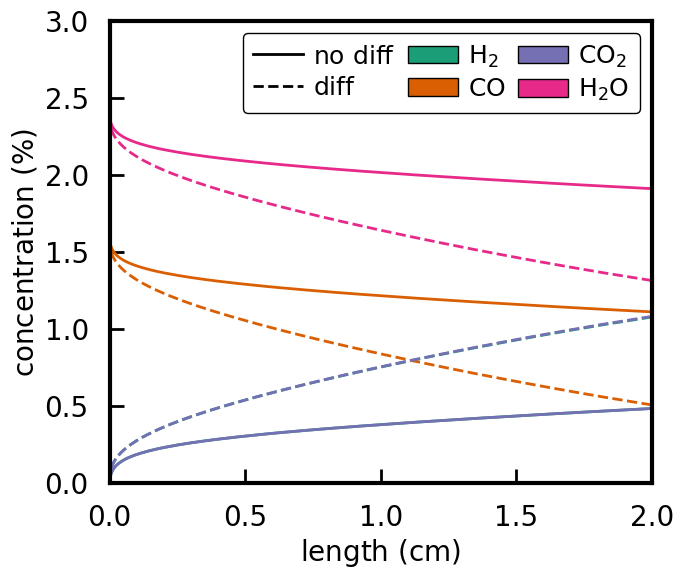

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd
import csv
%matplotlib inline

plt.rcParams['figure.figsize']=(7,6)
plt.rcParams['axes.linewidth'] = 3
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('axes', labelsize=20)
plt.rc('legend', fontsize=18)
plt.rcParams['lines.markersize'] = 10
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.direction']='in'
plt.rcParams['xtick.major.size']=10
plt.rcParams['xtick.major.width']=2
plt.rcParams['ytick.major.size']=10
plt.rcParams['ytick.major.width']=2
plt.rcParams['legend.edgecolor']='k'
plt.rcParams['axes.unicode_minus']=False
plt.rcParams["legend.framealpha"] = 1
plt.rcParams['xtick.major.pad'] = 15
plt.rcParams['ytick.major.pad'] = 15
plt.rcParams['legend.handletextpad']=0.4
plt.rcParams['legend.columnspacing']=0.5
plt.rcParams['legend.labelspacing']=0.3
plt.rcParams['legend.title_fontsize'] = 14
plt.rcParams['axes.formatter.limits']=(-3, 6)

colormap=plt.cm.Dark2
colors = [colormap(i) for i in np.linspace(0, 1, 8)]

diff=pd.read_csv('solution_files/sol_covdep_diff_450.csv', header=0)
no_diff=pd.read_csv('solution_files/sol_covdep_noDiff_450.csv', header=0)
equilibrium=pd.read_csv('../equilibrium.txt', header=0,sep='\t')

gs=gridspec.GridSpec(nrows=1, ncols=1)
gs.update(wspace=0.1)

ax0=plt.subplot(gs[0,0])  

ax0.plot(no_diff['z']*100,no_diff['H2']*100,color=colors[0])
ax0.plot(no_diff['z']*100,no_diff['CO']*100,color=colors[1])
ax0.plot(no_diff['z']*100,no_diff['CO2']*100,color=colors[2])
ax0.plot(no_diff['z']*100,no_diff['H2O']*100,color=colors[3])
ax0.plot(no_diff['z']*100,no_diff['CH4']*100,color=colors[4])

ax0.plot(diff['z']*100,diff['H2']*100,color=colors[0],linestyle='dashed')
ax0.plot(diff['z']*100,diff['CO']*100,color=colors[1],linestyle='dashed')
ax0.plot(diff['z']*100,diff['CO2']*100,color=colors[2],linestyle='dashed')
ax0.plot(diff['z']*100,diff['H2O']*100,color=colors[3],linestyle='dashed')
#ax0.plot(diff['z'],diff['CH4']*100,color=colors[4],linestyle='dashed', label='$\mathrm{CH_4}$')

ax0.plot(100,100,linestyle='solid',color='k', label='$\mathrm{no\ diff}$')
ax0.plot(100,100,linestyle='dashed',color='k', label='$\mathrm{diff}$')
ax0.plot(100,100,linestyle='None',marker='s',markeredgecolor='w',markerfacecolor='w', label='$\mathrm{ }$')

import matplotlib.patches as mpatches
patch_H2=mpatches.Patch(facecolor=colors[0], edgecolor='k', label='$\mathrm{H_2}$')
patch_CO=mpatches.Patch(facecolor=colors[1], edgecolor='k', label='$\mathrm{CO}$')
patch_CO2=mpatches.Patch(facecolor=colors[2], edgecolor='k', label='$\mathrm{CO_2}$')
patch_H2O=mpatches.Patch(facecolor=colors[3], edgecolor='k', label='$\mathrm{H_2O}$')

handles, labels = ax0.get_legend_handles_labels()
ax0.legend(handles=[handles[0], handles[1], patch_H2, patch_CO,patch_CO2,patch_H2O],ncol=3)

ax0.set_xlim([0,2])
ax0.set_ylim([0,3])
ax0.set_xlabel('$\mathrm{length\ (cm)}$')
ax0.set_ylabel('$\mathrm{concentration\ (\%)}$')

plt.savefig('wgs.pdf',bbox_inches='tight')
plt.show()


In [3]:
T=np.array([450,475,500,525,550,575,600])
species=['H2','CO','CO2','H2O','CH4']

def get_data(temp):
    diff=pd.read_csv('solution_files/sol_covdep_diff_' + str(temp) + '.csv', header=0)
    no_diff=pd.read_csv('solution_files/sol_covdep_noDiff_' + str(temp) + '.csv', header=0)
    
    values_nodiff=np.zeros(len(species))
    values_diff=np.zeros(len(species))
    for i,j in enumerate(species):
        values_diff[i]=diff[j].iloc[-1]*100
        values_nodiff[i]=no_diff[j].iloc[-1]*100     
        
    return values_diff, values_nodiff

t450=get_data(450)
t475=get_data(475)
t500=get_data(500)
t525=get_data(525)
t550=get_data(550)
t575=get_data(575)
t600=get_data(600)

tdiff=np.c_[t450[0],t475[0],t500[0],t525[0],t550[0],t575[0],t600[0]]
tnodiff=np.c_[t450[1],t475[1],t500[1],t525[1],t550[1],t575[1],t600[1]]

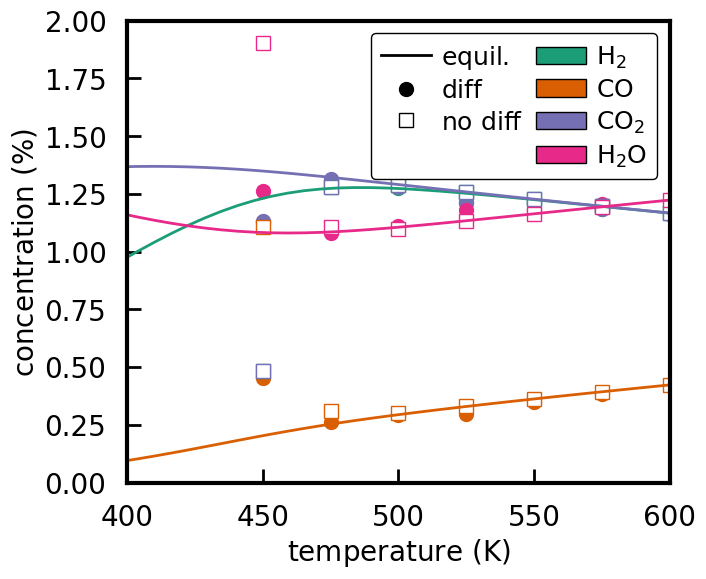

In [20]:
gs=gridspec.GridSpec(nrows=1, ncols=1)
gs.update(wspace=0.1)

ax0=plt.subplot(gs[0,0]) 

ax0.plot(T,tdiff[0],linestyle='None',color=colors[0],marker='o')
ax0.plot(T,tdiff[1],linestyle='None',color=colors[1],marker='o')
ax0.plot(T,tdiff[2],linestyle='None',color=colors[2],marker='o')
ax0.plot(T,tdiff[3],linestyle='None',color=colors[3],marker='o')

ax0.plot(T,tnodiff[0],linestyle='None',marker='s',markeredgecolor=colors[0],markerfacecolor='w')
ax0.plot(T,tnodiff[1],linestyle='None',marker='s',markeredgecolor=colors[1],markerfacecolor='w')
ax0.plot(T,tnodiff[2],linestyle='None',marker='s',markeredgecolor=colors[2],markerfacecolor='w')
ax0.plot(T,tnodiff[3],linestyle='None',marker='s',markeredgecolor=colors[3],markerfacecolor='w')

ax0.plot(equilibrium['t'],equilibrium['H2']*100,color=colors[0])
ax0.plot(equilibrium['t'],equilibrium['CO']*100,color=colors[1])
ax0.plot(equilibrium['t'],equilibrium['CO2']*100,color=colors[2])
ax0.plot(equilibrium['t'],equilibrium['H2O']*100,color=colors[3])

ax0.plot(100, 100, color='k',marker='None', linewidth=2,linestyle='solid', label='$\mathrm{equil.}$')
ax0.plot(100,100,linestyle='None',color='k',marker='o', label='$\mathrm{diff}$')
ax0.plot(100,100,linestyle='None',marker='s',markeredgecolor='k',markerfacecolor='w', label='$\mathrm{no\ diff}$')
ax0.plot(100,100,linestyle='None',marker='s',markeredgecolor='w',markerfacecolor='w', label='$\mathrm{ }$')

import matplotlib.patches as mpatches
patch_H2=mpatches.Patch(facecolor=colors[0], edgecolor='k', label='$\mathrm{H_2}$')
patch_CO=mpatches.Patch(facecolor=colors[1], edgecolor='k', label='$\mathrm{CO}$')
patch_CO2=mpatches.Patch(facecolor=colors[2], edgecolor='k', label='$\mathrm{CO_2}$')
patch_H2O=mpatches.Patch(facecolor=colors[3], edgecolor='k', label='$\mathrm{H_2O}$')

handles, labels = ax0.get_legend_handles_labels()
ax0.legend(handles=[handles[0], handles[1], handles[2],handles[3], patch_H2, patch_CO,patch_CO2,patch_H2O],ncol=2)

ax0.set_xlim([400,600])
ax0.set_ylim([0,2])
ax0.set_xlabel('$\mathrm{temperature\ (K)}$')
ax0.set_ylabel('$\mathrm{concentration\ (\%)}$')

plt.savefig('evaluation_wgs.pdf',bbox_inches='tight')